<a href="https://colab.research.google.com/github/arad4228/BigData_and_A.I/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5(3%EC%9B%94_29%EC%9D%BC_%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3월 29일 다변수 선형 회귀에 대한 과제

**1.** nbastat.csv에서 야투 시도 횟수(FGA), 3점슛 시도 횟수(3PA), 자유투 시도 횟수(FTA)로 부터 득점수(PTS)를 예측하는 모델을 만들고 이를 훈련하라.

In [32]:
# 각종 라이브러리 호출
import numpy as np
import pandas as pd
from google.colab import drive

In [33]:
# 구글 드라이브에 마운트
drive.mount ('/smuai')

Drive already mounted at /smuai; to attempt to forcibly remount, call drive.mount("/smuai", force_remount=True).


In [34]:
# 파일을 업로드 하기
from google.colab import files
files.upload()

Saving nbastat2022.csv to nbastat2022 (1).csv


{'nbastat2022.csv': b"#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF\r\n1,Joel Embiid,56,33.4,29.9,9.4,19.3,48.9,1.4,3.7,36.5,9.8,11.9,82.1,2.1,9.3,11.4,4.4,1,1.4,3,33.2\r\n2,Giannis Antetokounmpo,59,32.9,29.8,10.2,18.6,54.7,1.1,3.7,30,8.3,11.6,72.1,2,9.5,11.5,5.8,1.1,1.4,3.2,34.8\r\n3,LeBron James,51,36.9,29.5,11.1,21.3,52,2.8,8,35.7,4.5,6,76,1.1,7,8.1,6.2,1.4,1.1,3.5,31.1\r\n4,Luka Doncic,53,35.7,28.2,9.9,21.8,45.5,2.9,8.5,34.1,5.5,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6\r\n5,Trae Young,64,34.9,28,9.3,20.4,45.6,3,7.8,38,6.5,7.2,90,0.6,3.2,3.8,9.5,1,0.1,4,26.7\r\n6,DeMar DeRozan,65,36.1,27.9,10.2,20.2,50.4,0.6,1.8,35.6,6.9,7.9,87.1,0.8,4.6,5.4,5.2,0.9,0.3,2.4,26.3\r\n7,Ja Morant,55,33.3,27.5,10.2,20.7,49.3,1.6,4.6,34.1,5.5,7.3,76.2,1.3,4.4,5.8,6.7,1.2,0.4,3.4,26\r\n8,Jayson Tatum,66,36.4,26.7,9.2,21,43.9,2.9,8.6,33.7,5.4,6.3,85.4,1.2,7.1,8.3,4.2,1,0.7,2.8,25.3\r\n9,Nikola Jokic,63,33,26,9.9,17.2,57.4,1.5,4.1,35.4,4.8,6,80.8,2.7,11,13.8,8.1,1

In [35]:
# CSV파일 읽기
nbastat = pd.read_csv('nbastat2022.csv')
nbastat

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF
0,1.0,Joel Embiid,56.0,33.4,29.9,9.4,19.3,48.9,1.4,3.7,...,11.9,82.1,2.1,9.3,11.4,4.4,1.0,1.4,3.0,33.2
1,2.0,Giannis Antetokounmpo,59.0,32.9,29.8,10.2,18.6,54.7,1.1,3.7,...,11.6,72.1,2.0,9.5,11.5,5.8,1.1,1.4,3.2,34.8
2,3.0,LeBron James,51.0,36.9,29.5,11.1,21.3,52.0,2.8,8.0,...,6.0,76.0,1.1,7.0,8.1,6.2,1.4,1.1,3.5,31.1
3,4.0,Luka Doncic,53.0,35.7,28.2,9.9,21.8,45.5,2.9,8.5,...,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6
4,5.0,Trae Young,64.0,34.9,28.0,9.3,20.4,45.6,3.0,7.8,...,7.2,90.0,0.6,3.2,3.8,9.5,1.0,0.1,4.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,243.0,Isaiah Joe,48.0,11.6,3.6,1.1,3.3,35.0,0.8,2.5,...,0.5,92.3,0.1,0.9,1.0,0.7,0.3,0.1,0.3,3.1
245,244.0,Tony Snell,49.0,15.8,3.4,1.2,3.1,39.2,0.9,2.4,...,0.1,100.0,0.3,1.7,2.0,0.5,0.3,0.2,0.4,4.1
246,245.0,Dalano Banton,58.0,11.5,3.4,1.4,3.4,40.3,0.2,0.9,...,0.7,61.5,0.6,1.4,2.0,1.6,0.5,0.2,0.9,4.4
247,246.0,Trent Forrest,54.0,12.6,3.2,1.2,2.5,50.4,0.1,0.4,...,0.8,83.7,0.3,1.3,1.6,1.7,0.5,0.1,0.9,5.0


In [57]:
# 행 수를 count
m = len(nbastat)

In [58]:
# column들을 선택하기
# FGA, 3PA, FTA -> PTS
X1 = nbastat[['FGA']]
X2 = nbastat[['3PA']]
X3 = nbastat[['FTA']]
Y = nbastat[['PTS']]


In [59]:
# 결측값을 처리하기
X1 = X1.fillna(0)
X2 = X2.fillna(0)
X3 = X3.fillna(0)
Y = Y.fillna(0)

In [60]:
X1 = (np.array(X1)).reshape(m,1)
X2 = (np.array(X2)).reshape(m,1)
X3 = (np.array(X3)).reshape(m,1)
y = (np.array(Y)).reshape(m,1)

In [61]:
# [1, x1, x2, x3]으로 구성된 행렬 제작
X0 = np.ones((m,1))
Xb = np.c_[X0, X1, X2, X3]

In [62]:
# 경사하강법 준비
learning_rate = 0.0001
n_item = 500

In [63]:
# Theta에 대한 값을 초기화
theta = np.zeros((4,1))
gradients = np.zeros((4,1))

In [64]:
import numpy as np
def Compute_J(theta, Xb, Y):
  loss_vector = (np.array)(Xb.dot(theta)-Y)
  loss_vector = loss_vector.reshape(-1)
  loss2 = np.square(loss_vector)
  loss_sum = np.sum(loss2)/(2*m)
  return loss_sum

In [65]:
loss_arr = []
itr_arr = []

for i in range(n_item):
  gradients = (1.0/m)*Xb.T.dot(Xb.dot(theta)-Y)
  theta = theta - learning_rate*gradients
  loss = Compute_J(theta,Xb,Y)
  itr_arr.append(i)
  loss_arr.append(loss)

In [66]:
theta

array([[0.08565381],
       [1.03961349],
       [0.32678517],
       [0.32889952]])

Text(0, 0.5, 'loss')

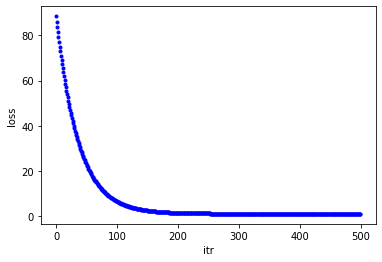

In [67]:
import matplotlib.pyplot as plt
plt.plot(itr_arr, loss_arr, '.b')
plt.xlabel("itr")
plt.ylabel("loss")

In [53]:
Xtest = np.array([[1,19.3, 3.7, 11/9]])
np.dot(Xtest, theta)

array([[21.76128753]])

In [68]:
Y_pred = Xb.dot(theta)
error = (1/len(Y_pred))*(Y_pred - Y).T.dot(Y_pred - Y)
print(error)

          PTS
PTS  1.982365


**2.** nbastat.csv에서 야투 성공률(FG%), 3점슛 성공률(3P%), 자유투 성공률(FT%)와 경기 출장 시간(MIN)으로 부터 득점수(PTS)를 예측하는 모델을 만들고 이를 훈련시키시오

In [ ]:
# 행 수를 count
m = len(nbastat)

In [ ]:
# column들을 선택하기
# FG%, 3P%, FT%, MIN -> PTS
X1 = nbastat[['MIN']]
X2 = nbastat[['FG%']]
X3 = nbastat[['3P%']]
X4 = nbastat[['FT%']]
Y = nbastat[['PTS']]

In [ ]:
# 결측값을 처리하기
X1 = X1.fillna(0)
X2 = X2.fillna(0)
X3 = X3.fillna(0)
X4 = X4.fillna(0)
Y = Y.fillna(0)

In [ ]:
X1 = (np.array(X1)).reshape(m,1)
X2 = (np.array(X2)).reshape(m,1)
X3 = (np.array(X3)).reshape(m,1)
X4 = (np.array(X4)).reshape(m,1)
y = (np.array(Y)).reshape(m,1)

In [ ]:
# [1, x1 X x2, x1 X x3, x1 X x4]으로 구성된 행렬 제작
X0 = np.ones((m,1))
Xb = np.c_[X0, X1*X2*1/100, X1*X3*1/100, X1*X4*1/100]

In [ ]:
# 경사하강법 준비
learning_rate = 0.00002
n_item = 700

In [ ]:
# Theta에 대한 값을 초기화
theta = np.zeros((4,1))
gradients = np.zeros((4,1))

In [ ]:
loss_arr2 = []
itr_arr2 = []

for i in range(n_item):
  gradients = (1.0/m)*Xb.T.dot(Xb.dot(theta)-Y)
  theta = theta - learning_rate*gradients
  loss = Compute_J(theta,Xb,Y)
  itr_arr2.append(i)
  loss_arr2.append(loss)

In [ ]:
theta

array([[0.01295309],
       [0.246484  ],
       [0.17251091],
       [0.40094607]])

Text(0, 0.5, 'loss')

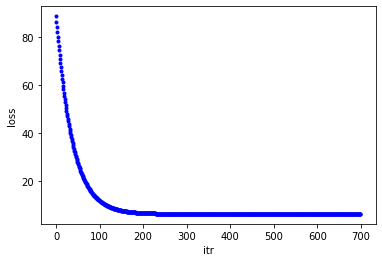

In [ ]:
import matplotlib.pyplot as plt
plt.plot(itr_arr2, loss_arr2, '.b')
plt.xlabel("itr")
plt.ylabel("loss")